## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



In [10]:
import math
def sign(x):
    return math.copysign(1,x)

In [11]:
def bisection_method(fname,b,a,tolx):
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb)>=0:
        print('Impossibile applicare il metodo di bisezione')
        return None,None,None

    it = 0 
    v_xk = []

    while abs(b-a)>tolx:
        xk = a +(b-a)/2
        v_xk.append(xk)
        it += 1
        fxk = fname(xk)
        if fxk == 0:
            return xk,it,v_xk
        if sign(fa*fxk)<0:
            b = xk
            fb = fxk
        else: 
            a=xk 
            fa = fxk

    return xk, it,v_xk

In [111]:
def false_method(fname,b,a,tolx,tolf,maxit):
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb)>=0:
        print('Impossibile applicare il metodo di bisezione')
        return None,None,None

    it = 0 
    v_xk = []
    errorex = 1 + tolf
    fxk = 1 + tolx
    xprec = a
    while it<maxit and abs(fxk)>tolx and errorex>tolf:
        xk = a - fa * (b-a)/(fb-fa)
        v_xk.append(xk)
        it += 1
        fxk = fname(xk)
        if fxk == 0:
            return xk,it,v_xk
        if sign(fa*fxk)<0:
            b = xk
            fb = fxk
        elif sign(fb*fxk)<0: 
            a=xk 
            fa = fxk
        
        if(xk!=0):
            errorex = abs(xk-xprec)/abs(xk)
        else:
            errorex =abs(xk-xprec)
        xprec = xk
    return xk, it,v_xk

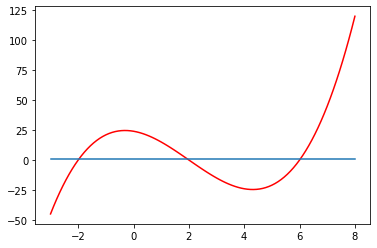

In [8]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: x**3 - 6*x**2 - 4*x +24
x = np.linspace(-3.0,8.0,100)
plt.plot(x,f(x),'r-',x,np.ones_like(f(x)))

In [113]:
a1 = -3.0
b1 = 0.0
tolx = 1e-12
xk,it,v_xk =bisection_method(f,a1,b1,tolx)
print ("Soluzione di bisezione:",xk,"Numero di iterazioni:",it)

Soluzione di bisezione: -1.4142135623726517 Numero di iterazioni: 42


[1.33333333 0.90909091 0.71111111 0.63212435 0.60260973 0.59185325
 0.58796891 0.58657087 0.58606829 0.5858877  0.58582282 0.58579951
 0.58579113 0.58578812 0.58578704 0.58578666 0.58578652 0.58578647
 0.58578645 0.58578644 0.58578644 0.58578644 0.58578644 0.58578644
 0.58578644 0.58578644 0.58578644 0.58578644 0.58578644]


ValueError: x and y must have same first dimension, but have shapes (42,) and (29,)

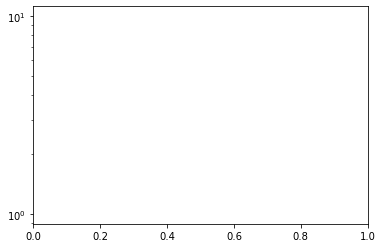

In [ ]:
alpha = -2.0
ek = np.abs(np.array(v_xk) - alpha)


tolf = 1e-12
maxit=100
xk_falsi,it_falsi,v_xk_falsi=false_method(f,a1,b1,tolx,tolf,maxit)
ek_falsi = np.abs(np.array(v_xk_falsi)-alpha)
print(ek_falsi)

plt.semilogy(np.arange(it),ek,'r*',np.arange(it_falsi),ek_falsi,'b*')

In [63]:
a2 = 0.000000000005
b2 = 5.999999996999999
xk, it,v_xk = bisection_method(f,a2,b2,tolx)
print ("Soluzione di bisezione:",xk,"Numero di iterazioni:",it)


Soluzione di bisezione: 1.9999999999994569 Numero di iterazioni: 43


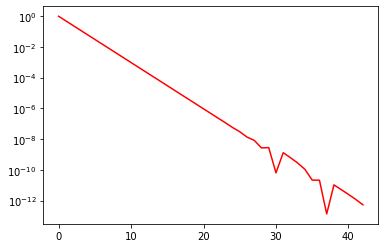

In [65]:
alpha = 2.0
ek = np.abs(np.array(v_xk)-alpha)
plt.semilogy(np.arange(it),ek,'r-')

In [79]:
a3 = 5
b3 = 11
xk, it,v_xk = bisection_method(f,a3,b3,tolx)
print ("Soluzione di bisezione:",xk,"Numero di iterazioni:",it)


Soluzione di bisezione: 5.999999999999773 Numero di iterazioni: 43


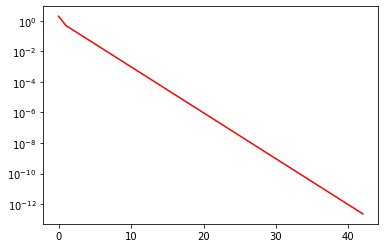

In [80]:
alpha = 6.0
ek = np.abs(np.array(v_xk)-alpha)
plt.semilogy(np.arange(it),ek,'r-')

**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

Soluzione di bisezione: 1.4142135623724243 
Numero di iterazioni: 40


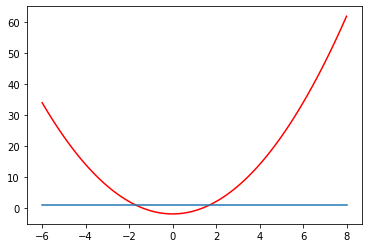

In [93]:
f = lambda x: x**2-2
a2 = 1
b2 = 2
xk2,it2,v_xk2 = bisection_method(f,a2,b2,tolx)
print ("Soluzione di bisezione:",xk2,"\nNumero di iterazioni:",it2)

x = np.linspace(-6.0,8.0,100)
plt.plot(x,f(x),'r-',x,np.ones_like(f(x)))

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg